<a href="https://colab.research.google.com/github/dewifatimahazzahra/Data_Mining_Dewi_0110223142/blob/main/Tugas_DM_praktikum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIK AWAL**

In [21]:
# import library
import pandas as pd

# mounting file drive
from google.colab import drive
drive.mount('/content/gdrive')

# membaca file dari direktori file csv
df = pd.read_csv("gdrive/My Drive/ColabDataMining/babies.csv")
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


In [22]:
# info() memberikan informasi seperti tipe data setiap kolom
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [23]:
# Untuk menampilkan ringkasan statistik deskriptif dari DataFrame 'df'
df.describe()


,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [24]:
# Mengecek nilai yang hilang (null) di setiap kolom dalam DataFrame 'df'
df.isnull().sum()


,0
case,0
bwt,0
gestation,13
parity,0
age,2
height,22
weight,36
smoke,10


In [25]:
# Daftar kolom yang akan dihapus dari DataFrame
columns_drop = ['gestation','age', 'height', 'weight', 'smoke']

# Menghapus kolom yang ada di daftar 'columns_drop' dari DataFrame 'df'
df.drop(columns = columns_drop, inplace=True)
df

,case,bwt,parity
0,1,120,0
1,2,113,0
2,3,128,0
3,4,123,0
4,5,108,0
...,...,...,...
1231,1232,113,1
1232,1233,128,0
1233,1234,130,0
1234,1235,125,1


In [26]:
df.set_index('case', inplace=True)
df

,bwt,parity
case,,
1,120,0
2,113,0
3,128,0
4,123,0
5,108,0
...,...,...
1232,113,1
1233,128,0
1234,130,0


In [27]:
# Mengubah nama kolom pada DataFrame 'df' agar lebih mudah dipahami
df.rename(columns={
    'case':'kasus',
    'bwt':'berat_badan_bayi',
    'parity':'status_kehamilan_pertama'

}, inplace=True)

# Tampilkan DataFrame setelah perubahan nama kolom
df

,berat_badan_bayi,status_kehamilan_pertama
case,,
1,120,0
2,113,0
3,128,0
4,123,0
5,108,0
...,...,...
1232,113,1
1233,128,0
1234,130,0


## **VISUALISASI**

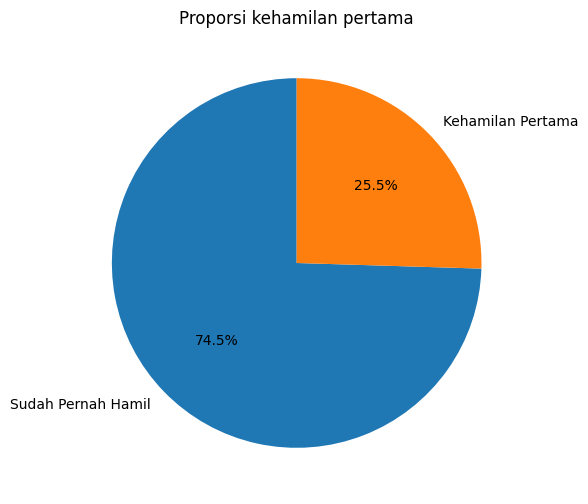

In [28]:
# @title Proporsi kehamilan pertama

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
counts = df['status_kehamilan_pertama'].value_counts()
labels = ['Sudah Pernah Hamil', 'Kehamilan Pertama']
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
_ = plt.title('Proporsi kehamilan pertama')

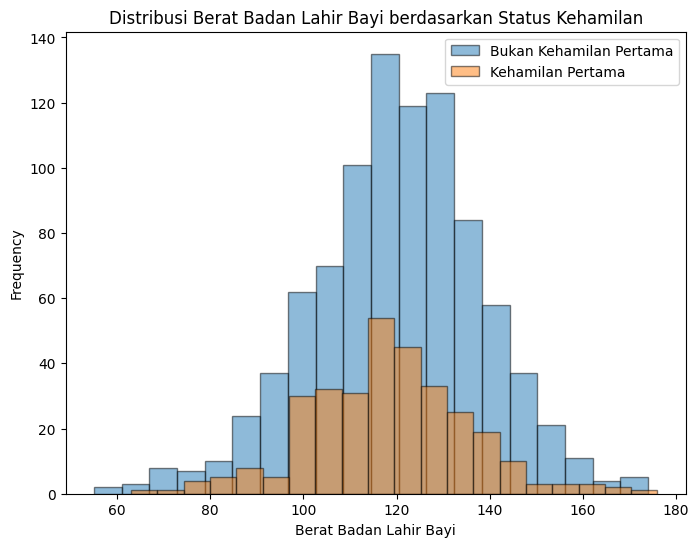

In [29]:
# @title Distribusi Berat Badan Lahir Bayi berdasarkan Status Kehamilan

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df[df['status_kehamilan_pertama'] == 0]['berat_badan_bayi'], bins=20, alpha=0.5, label='Bukan Kehamilan Pertama', edgecolor='black')
plt.hist(df[df['status_kehamilan_pertama'] == 1]['berat_badan_bayi'], bins=20, alpha=0.5, label='Kehamilan Pertama', edgecolor='black')
plt.xlabel('Berat Badan Lahir Bayi')
plt.ylabel('Frequency')
plt.title('Distribusi Berat Badan Lahir Bayi berdasarkan Status Kehamilan')
_ = plt.legend()

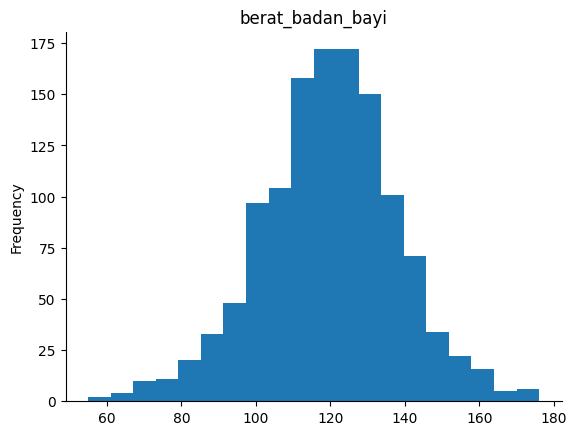

In [30]:
# @title Berat Badan Bayi

from matplotlib import pyplot as plt
df['berat_badan_bayi'].plot(kind='hist', bins=20, title='berat_badan_bayi')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **NORMALISASI**

In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalisasi MinMaxScaler
scaler = MinMaxScaler()
scaled_databayi1 = scaler.fit_transform(df)

# Panggil hasil Normalisasi
print("Data Asli:")
print(df)
print("\nData Setelah min-max scaling:")
print(scaled_databayi1)


Data Asli:
      berat_badan_bayi  status_kehamilan_pertama
case                                            
1                  120                         0
2                  113                         0
3                  128                         0
4                  123                         0
5                  108                         0
...                ...                       ...
1232               113                         1
1233               128                         0
1234               130                         0
1235               125                         1
1236               117                         0

[1236 rows x 2 columns]

Data Setelah min-max scaling:
[[0.53719008 0.        ]
 [0.47933884 0.        ]
 [0.60330579 0.        ]
 ...
 [0.61983471 0.        ]
 [0.5785124  1.        ]
 [0.51239669 0.        ]]


In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Normalisasi StandardScaler
scaler = StandardScaler()
z_score_databayi1 = scaler.fit_transform(df)

# Panggil hasil Normalisasi
print("Data Asli:")
print(df)
print("\nData Setelah z_score Transformation:")
print(z_score_databayi1)


Data Asli:
      berat_badan_bayi  status_kehamilan_pertama
case                                            
1                  120                         0
2                  113                         0
3                  128                         0
4                  123                         0
5                  108                         0
...                ...                       ...
1232               113                         1
1233               128                         0
1234               130                         0
1235               125                         1
1236               117                         0

[1236 rows x 2 columns]

Data Setelah z_score Transformation:
[[ 0.02321232 -0.58482437]
 [-0.36078965 -0.58482437]
 [ 0.46207172 -0.58482437]
 ...
 [ 0.57178657 -0.58482437]
 [ 0.29749945  1.70991506]
 [-0.14135995 -0.58482437]]


In [33]:
# Definisikan faktor skala untuk scaling data
scaling_faktor = 1000

# Melakukan scaling pada seluruh kolom di dataframe df dengan membagi nilai-nilai dengan scaling_faktor
scaled_databayi2 = df / scaling_faktor

# Menampilkan data asli sebelum dilakukan scaling
print("Data Asli :")
print(df)

# Menampilkan data setelah dilakukan decimal scaling
print("\nData Setelah Decimal Scaling :")
print(scaled_databayi2)


Data Asli :
      berat_badan_bayi  status_kehamilan_pertama
case                                            
1                  120                         0
2                  113                         0
3                  128                         0
4                  123                         0
5                  108                         0
...                ...                       ...
1232               113                         1
1233               128                         0
1234               130                         0
1235               125                         1
1236               117                         0

[1236 rows x 2 columns]

Data Setelah Decimal Scaling :
      berat_badan_bayi  status_kehamilan_pertama
case                                            
1                0.120                     0.000
2                0.113                     0.000
3                0.128                     0.000
4                0.123                     0.000
